## Lab 3. Linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',font_scale=1.75)
from datetime import datetime

def dailyAvg(data,windowsize):
    data = np.array(data)
    data = data[0:windowsize*int(len(data)/windowsize)]
    return np.nanmean(np.reshape(data,[int(len(data)/windowsize),windowsize]),axis=1)


### Visualize the data
1. Read in US-MMS_short.csv
2. Plot out daily time series of leaf area index (LAI), net ecosystem exchange (NEE)
3. Plot a scatter plot of LAI vs NEE

Text(0, 0.5, 'dNEE')

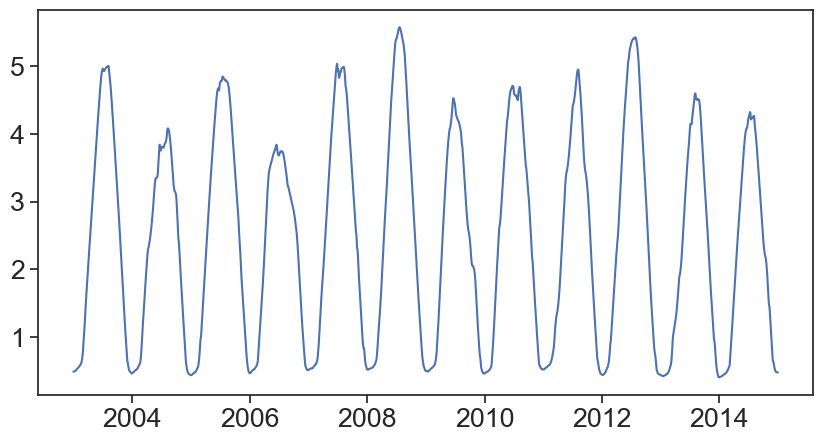

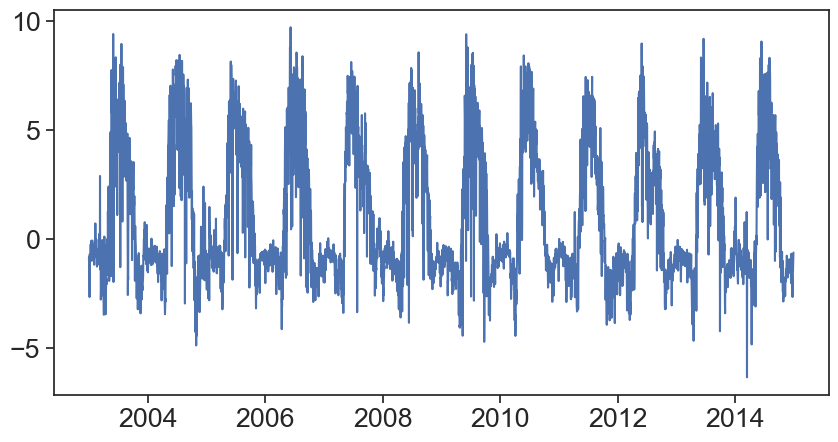

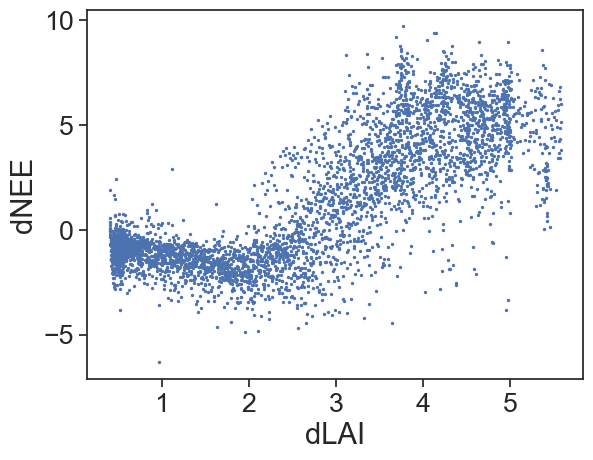

In [25]:
df = pd.read_csv('../Data/US-MMS_short.csv')
dLAI = dailyAvg(df['LAI'],24)
dNEE = -dailyAvg(df['NEE'],24)
dTA = dailyAvg(df['TA'],24)

## Get the time stamp and month ID for each day.
tt_day = np.array([datetime(df['YEAR'].iloc[i*24],df['MONTH'].iloc[i*24],df['DAY'].iloc[i*24]) 
                   for i in range(len(df)//24)])
tt_month = np.array([itm.month for itm in tt_day])




## Plot daily LAI

plt.figure(figsize=(10,5))
plt.plot(tt_day,dLAI,label = "dLAI")


## Plot daily NEE
plt.figure(figsize=(10,5))
plt.plot(tt_day,dNEE,label = "dNEE")

## Plot a scatter plot of LAI and NEE
plt.figure()
# plt.plot(dLAI,dNEE,'o',markersize=2)
plt.scatter(dLAI,dNEE,s=2)
plt.xlabel('dLAI');plt.ylabel('dNEE')

## Univariate/multivariate regression

[[1.         0.48964491]
 [1.         0.4891523 ]
 [1.         0.48865969]
 ...
 [1.         0.47790179]
 [1.         0.47827124]
 [1.         0.4786407 ]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     6580.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:00:32   Log-Likelihood:                -9117.3
No. Observations:                4382   AIC:                         1.824e+04
Df Residuals:                    4380   BIC:                         1.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|

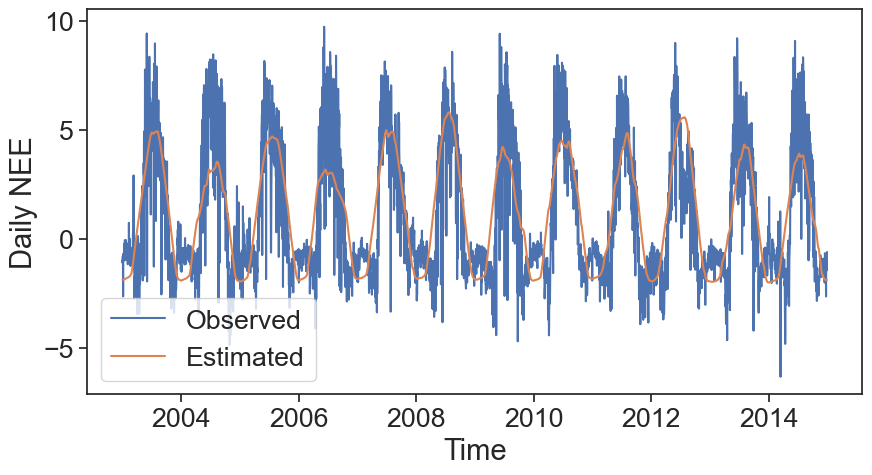

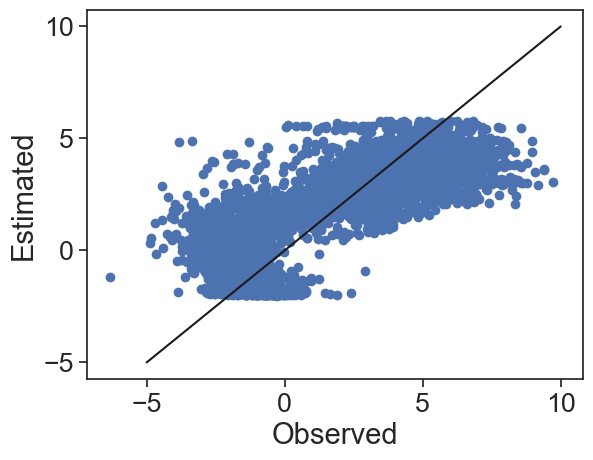

In [43]:
import statsmodels.api as sm

## dNEE ~ b0 + b1*dLAI + noise
y = dNEE.copy()

# x = np.column_stack([dLAI,dTA]) # x = dLAI.copy() for univariate regression
x = dLAI.copy()
x = sm.add_constant(x)
print(x)

lm1 = sm.OLS(y,x).fit()

print(lm1.summary())
yhat = lm1.predict(x)

## Plot a time series of y and yhat on the same figure
plt.figure(figsize=(10,5))
plt.plot(tt_day,dNEE,label='Observed')
plt.plot(tt_day,yhat,label='Estimated')
plt.xlabel('Time')
plt.ylabel('Daily NEE')
plt.legend()

## Plot a scatter plot with x-axis showing y and y-axis showing yhat for comparison
plt.figure()
plt.scatter(y,yhat)
plt.xlabel('Observed')
plt.ylabel('Estimated')
plt.plot([-5,10],[-5,10],'-k')

## Time for HW2, question 1